C:\Users\Admin\AppData\Local\Temp\ipykernel_34504\3321077609.py:54: RuntimeWarning: invalid value encountered in scalar divide
  A = (A1**2) / (phi / Kfluid + (1 - phi) / Kmat_1 - Kdry / Kmat_1**2)


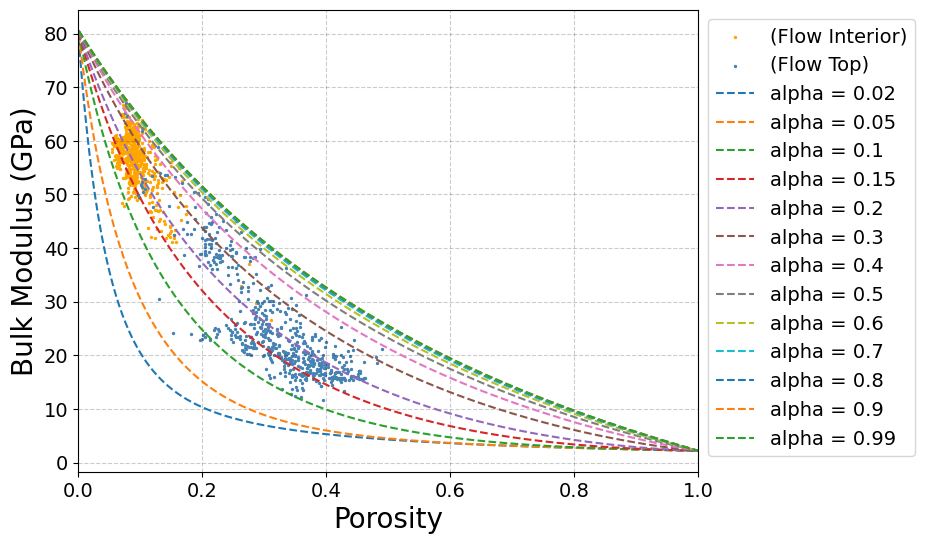

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel('Wallula.xlsx', sheet_name='Filtered_Data_HS')

# Variables
phii = np.linspace(0, 1, num=1000)  # Porosity range
Kmat_1 = 80.72          # Matrix bulk modulus (GPa)
Gmat_1 = 41.51          # Matrix shear modulus (GPa)
dens = df['RHOB']       # Density from data
alpha = [0.02, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]

# Input data for well plot
Ksatlog = df['K_log']
porosity_data = df['Phi']

# Assign colors based on zones
zone_colors = {'Flow Interior': 'orange', 'Flow Top': 'steelblue'}
df['Color'] = df['ZONE'].map(zone_colors)

# Plot well data
plt.figure(figsize=(8, 6))
for zone, color in zone_colors.items():
    zone_data = df[df['ZONE'] == zone]
    plt.scatter(zone_data['Phi'], zone_data['K_log'], s=2, color=color, alpha=1, label=f'({zone})')

# Initialize arrays for storing results
Ksat_values = np.zeros((len(alpha), len(phii)))

# Main calculations
for j_idx, j in enumerate(alpha):
    for i, phi in enumerate(phii):
        # Alpha-dependent terms
        if j < 1:
            theta = j * (np.arccos(j) - j * np.sqrt(1 - j**2)) / ((1 - j**2)**1.5)
        else:
            theta = j * (-np.arccosh(j) + j * np.sqrt(j**2 - 1)) / ((j**2 - 1)**1.5)
        g = ((j**2) * (3 * theta - 2)) / (1 - j**2)

        s0 = (2 - 3 * g - 3 * theta) / (4 * theta - 4 * g - 6 * theta**2)
        s1 = (theta - g) / (2 - 3 * g - 3 * theta)
        s2 = 4 / 3
        s3 = 2 * (theta - g) / (3 * (2 * theta - 2 * g - 3 * theta**2))

        # Calculate dry bulk modulus
        Kdry = Kmat_1 * ((1 - phi)**(s0 * (s1 + s2 - s3 + (s1 - s3) * (s2 - s3) / (s3 + Kmat_1 / Gmat_1)))) / \
               (1 + Kmat_1 * phi * s0 / Gmat_1)
        
        # Apply Gassmann equation
        Kfluid = 2.2  # Example fluid bulk modulus (GPa)
        A1 = 1 - (Kdry / Kmat_1)
        A = (A1**2) / (phi / Kfluid + (1 - phi) / Kmat_1 - Kdry / Kmat_1**2)
        Ksat_values[j_idx, i] = Kdry + A
        
    # Plot results for current alpha
    plt.plot(phii, Ksat_values[j_idx], linestyle='--', label=f'alpha = {j}')

# Finalize plot with increased text size
plt.xlabel('Porosity', fontsize=20)  # Increased label font size
plt.ylabel('Bulk Modulus (GPa)', fontsize=20)  # Increased label font size
plt.grid(True, linestyle='--', color='black', alpha=0.2)
plt.xticks(fontsize=14)  # Increased x-tick label font size
plt.yticks(fontsize=14)  # Increased y-tick label font size
plt.xlim(0,1)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=14)  # Increased legend font size
plt.show()
